## mmsegmentation 数据集准备

In [1]:
import os
os.chdir('mmsegmentation')

os.getcwd()

'/home/wmy/wmy/summer_project/image-segmentation-practice/mmsegmentation'

### 数据集放在`mmsegmentation`中

In [2]:
# 删除原有的数据集目录（如有）
!rm -rf Watermelon87_Semantic_Seg_Mask.zip Watermelon87_Semantic_Seg_Mask

# 下载数据集压缩包
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip

# 解压
!unzip Watermelon87_Semantic_Seg_Mask.zip >> /dev/null

# 删除压缩包
!rm -rf Watermelon87_Semantic_Seg_Mask.zip

--2023-09-19 00:55:23--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13230174 (13M) [application/zip]
Saving to: ‘Watermelon87_Semantic_Seg_Mask.zip’

Watermelon87_Semant 100%[===================>]  12.62M  5.58MB/s    in 2.3s    

2023-09-19 00:55:25 (5.58 MB/s) - ‘Watermelon87_Semantic_Seg_Mask.zip’ saved [13230174/13230174]



In [3]:
# 西瓜图片和视频
!rm -rf ./data
os.mkdir('data')

!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/watermelon/data/watermelon_test1.jpg -P data

!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/watermelon/data/video_watermelon_2.mp4 -P data

!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/watermelon/data/video_watermelon_3.mov -P data

--2023-09-19 00:55:35--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/watermelon/data/watermelon_test1.jpg
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1036141 (1012K) [image/jpeg]
Saving to: ‘data/watermelon_test1.jpg’

watermelon_test1.jp 100%[===================>]   1012K  5.14MB/s    in 0.2s    

2023-09-19 00:55:36 (5.14 MB/s) - ‘data/watermelon_test1.jpg’ saved [1036141/1036141]

--2023-09-19 00:55:36--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/watermelon/data/video_watermelon_2.mp4
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-

## 可视化处理

In [4]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 指定单张图像路径
img_path = 'Watermelon87_Semantic_Seg_Mask/img_dir/train/045_sozai_l.jpg'
mask_path = 'Watermelon87_Semantic_Seg_Mask/ann_dir/train/045_sozai_l.png'

In [6]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [7]:
# mask 语义分割标注，与原图大小相同
np.unique(mask)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

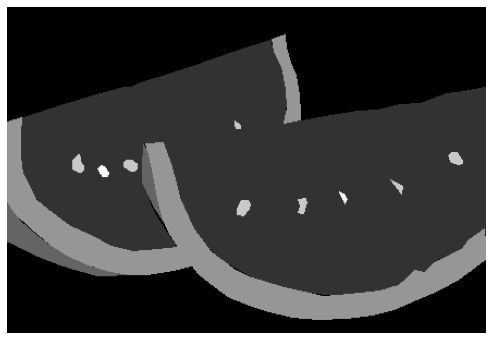

In [8]:
plt.figure(figsize=(10, 6))
plt.imshow(mask*50)
plt.axis('off')
plt.show()

### 颜色可视化

In [9]:
# 每个类别的 BGR 配色
palette = [
    ['background', [127,127,127]],
    ['red', [0,0,200]],
    ['green', [0,200,0]],
    ['white', [144,238,144]],
    ['seed-black', [30,30,30]],
    ['seed-white', [8,189,251]]
]

palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]

In [10]:
mask = mask[:,:,0]

# 将整数ID，映射为对应类别的颜色
viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
for idx in palette_dict.keys():
    viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
viz_mask_bgr = viz_mask_bgr.astype('uint8')

# 将语义分割标注图和原图叠加显示
opacity = 0.2 # 透明度越大，可视化效果越接近原图
label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)

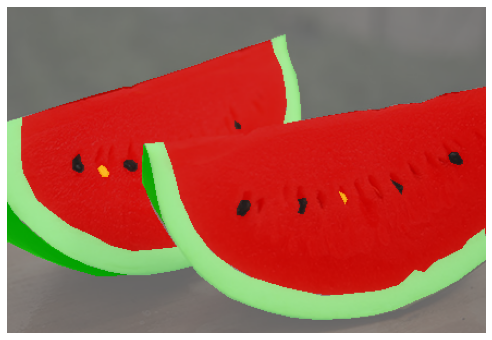

In [11]:
plt.figure(figsize=(10, 6))
plt.imshow(label_viz[:,:,::-1])
plt.axis('off')
plt.show()

### 批量可视化

In [12]:
# 指定图像和标注路径

# 训练集
PATH_IMAGE = 'Watermelon87_Semantic_Seg_Mask/img_dir/train'
PATH_MASKS = 'Watermelon87_Semantic_Seg_Mask/ann_dir/train'

# 测试集
# PATH_IMAGE = 'Watermelon87_Semantic_Seg_Mask/img_dir/val'
# PATH_MASKS = 'Watermelon87_Semantic_Seg_Mask/ann_dir/val'

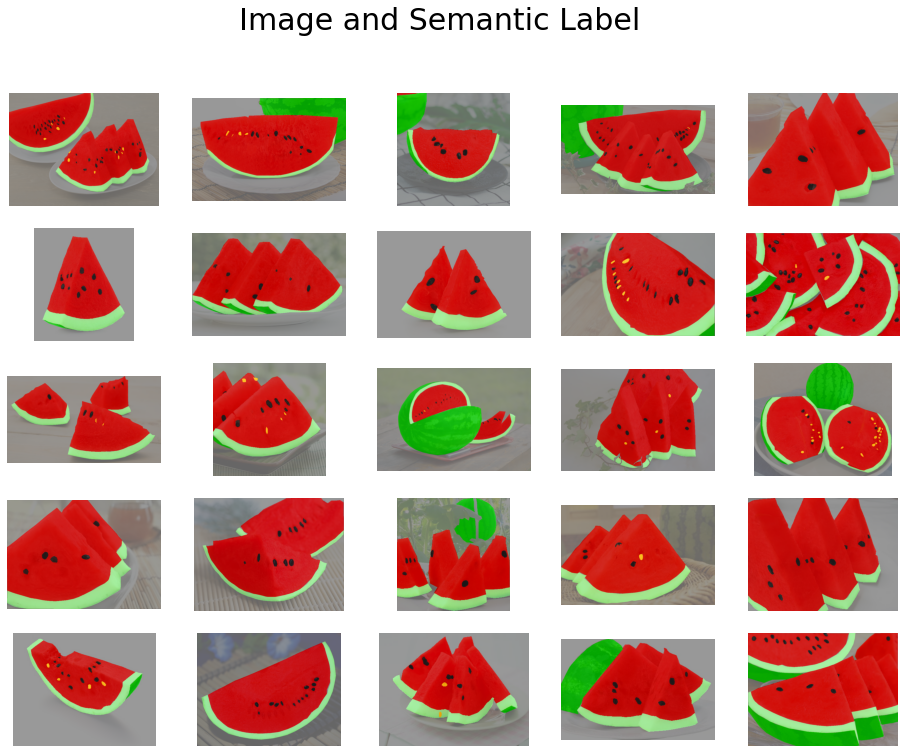

In [13]:
# n 行 n 列可视化
n = 5

# 透明度越大，可视化效果越接近原图
opacity = 0.2 

fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(16, 12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    mask = mask[:,:,0]

    # 将预测的整数ID，映射为对应类别的颜色
    viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
    for idx in palette_dict.keys():
        viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
    viz_mask_bgr = viz_mask_bgr.astype('uint8')

    # 将语义分割标注图和原图叠加显示
    label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)
    
    # 可视化
    axes[i//n, i%n].imshow(label_viz[:,:,::-1])
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
# plt.tight_layout()
plt.savefig('outputs/D-2.jpg')
plt.show()

## 数据集配置文件

### 定义数据集

In [15]:
!rm -rf mmseg/datasets/ZihaoDataset.py # 删除原有文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/watermelon/configs/ZihaoDataset.py -P mmseg/datasets

--2023-09-19 00:58:46--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/watermelon/configs/ZihaoDataset.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816 [binary/octet-stream]
Saving to: ‘mmseg/datasets/ZihaoDataset.py’

ZihaoDataset.py     100%[===================>]     816  --.-KB/s    in 0s      

2023-09-19 00:58:46 (15.3 MB/s) - ‘mmseg/datasets/ZihaoDataset.py’ saved [816/816]



### 注册数据集类

In [14]:
!rm -rf mmseg/datasets/__init__.py # 删除原有文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/watermelon/configs/__init__.py -P mmseg/datasets

--2023-09-19 00:58:45--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/watermelon/configs/__init__.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2620 (2.6K) [binary/octet-stream]
Saving to: ‘mmseg/datasets/__init__.py’

__init__.py         100%[===================>]   2.56K  --.-KB/s    in 0s      

2023-09-19 00:58:45 (88.4 MB/s) - ‘mmseg/datasets/__init__.py’ saved [2620/2620]



### pipeline 配置文件

In [16]:
!rm -rf configs/_base_/datasets/ZihaoDataset_pipeline.py
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/watermelon/configs/ZihaoDataset_pipeline.py -P configs/_base_/datasets

--2023-09-19 00:59:32--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/watermelon/configs/ZihaoDataset_pipeline.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2489 (2.4K) [binary/octet-stream]
Saving to: ‘configs/_base_/datasets/ZihaoDataset_pipeline.py’

ZihaoDataset_pipeli 100%[===================>]   2.43K  --.-KB/s    in 0s      

2023-09-19 00:59:32 (108 MB/s) - ‘configs/_base_/datasets/ZihaoDataset_pipeline.py’ saved [2489/2489]

